# 예전모델

In [117]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split data into X and Y
X = dataset[:, 0:8]
y = dataset[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# fit model into training-data
model = XGBClassifier()
model.fit(x_train, y_train)

# 예전모델
calculate_accuracy(model, x_test, y_test)

Accuracy: 81.17%


0.8116883116883117

# 개선된 모델

In [206]:
# https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster

model = XGBClassifier(
    booster='dart',
    objective='binary:logistic',
    learning_rate=0.07,
    n_estimators=100,
    reg_alpha =0.49,
    reg_lambda=0.95,
    max_depth=3,
    subsample=0.9
)
model.fit(
    x_train, 
    y_train,
    eval_metric='map',
    verbose=True
)

print(model.evals_result)
calculate_accuracy(model, x_test, y_test)

<bound method XGBClassifier.evals_result of XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.49, reg_lambda=0.95, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9)>
Accuracy: 84.42%


0.8441558441558441

In [208]:
patient = {
    'Pregnancies': [1], 
    'Glucose': [161], 
    'BloodPressure': [72], 
    'SkinThickness': [35], 
    'Insulin': [0], 
    'BMI': [28.1], 
    'DiabetesPedigreeFunction': [0.527], 
    'Age': [20]
}
value_patient = [1, 161, 72, 35, 0, 28.1, 0.527, 20]

l = model.predict_proba(value_patient)
print('No diabetes: {:.2%}\n Yes diabetes: {:.2%}'.format(l[0][0], l[0][1]))

No diabetes: 49.38%
 Yes diabetes: 50.62%


In [1]:
# pima indians diabetes
"""
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1) -- diabetes
"""
names = [
    '# of preganant',
    'Glucose concentration',
    'Blood pressure',
    'Skin fold thinckness',
    '2-hour insulin',
    'BMI',
    'Diabetes pedigree',
    'Age',
    'Result'
]

# XGBClassifier

class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

https://xgboost.readthedocs.io/en/latest/python/python_api.html

# Leaf value

https://stackoverflow.com/questions/40926340/what-does-the-value-of-leaf-in-the-following-xgboost-model-tree-diagram-means

For a classification tree with 2 classes {0,1}, the value of the leaf node represent the raw score for class 1. It can be converted to a probability score by using the logistic function. The calculation below use the left most leaf as an example.

1/(1+np.exp(-1*0.167528))=0.5417843204057448
What this means is if a data point ends up being distributed to this leaf, the probability of this data point being class 1 is 0.5417843204057448.

In [10]:
import numpy as np

def print_prob(leaf_value):
    result = 1/(1+np.exp(-1*leaf_value))
    print('{:.2%}'.format(result))
    return result

print_prob(-0.11200003)

47.20%


0.4720292251878975

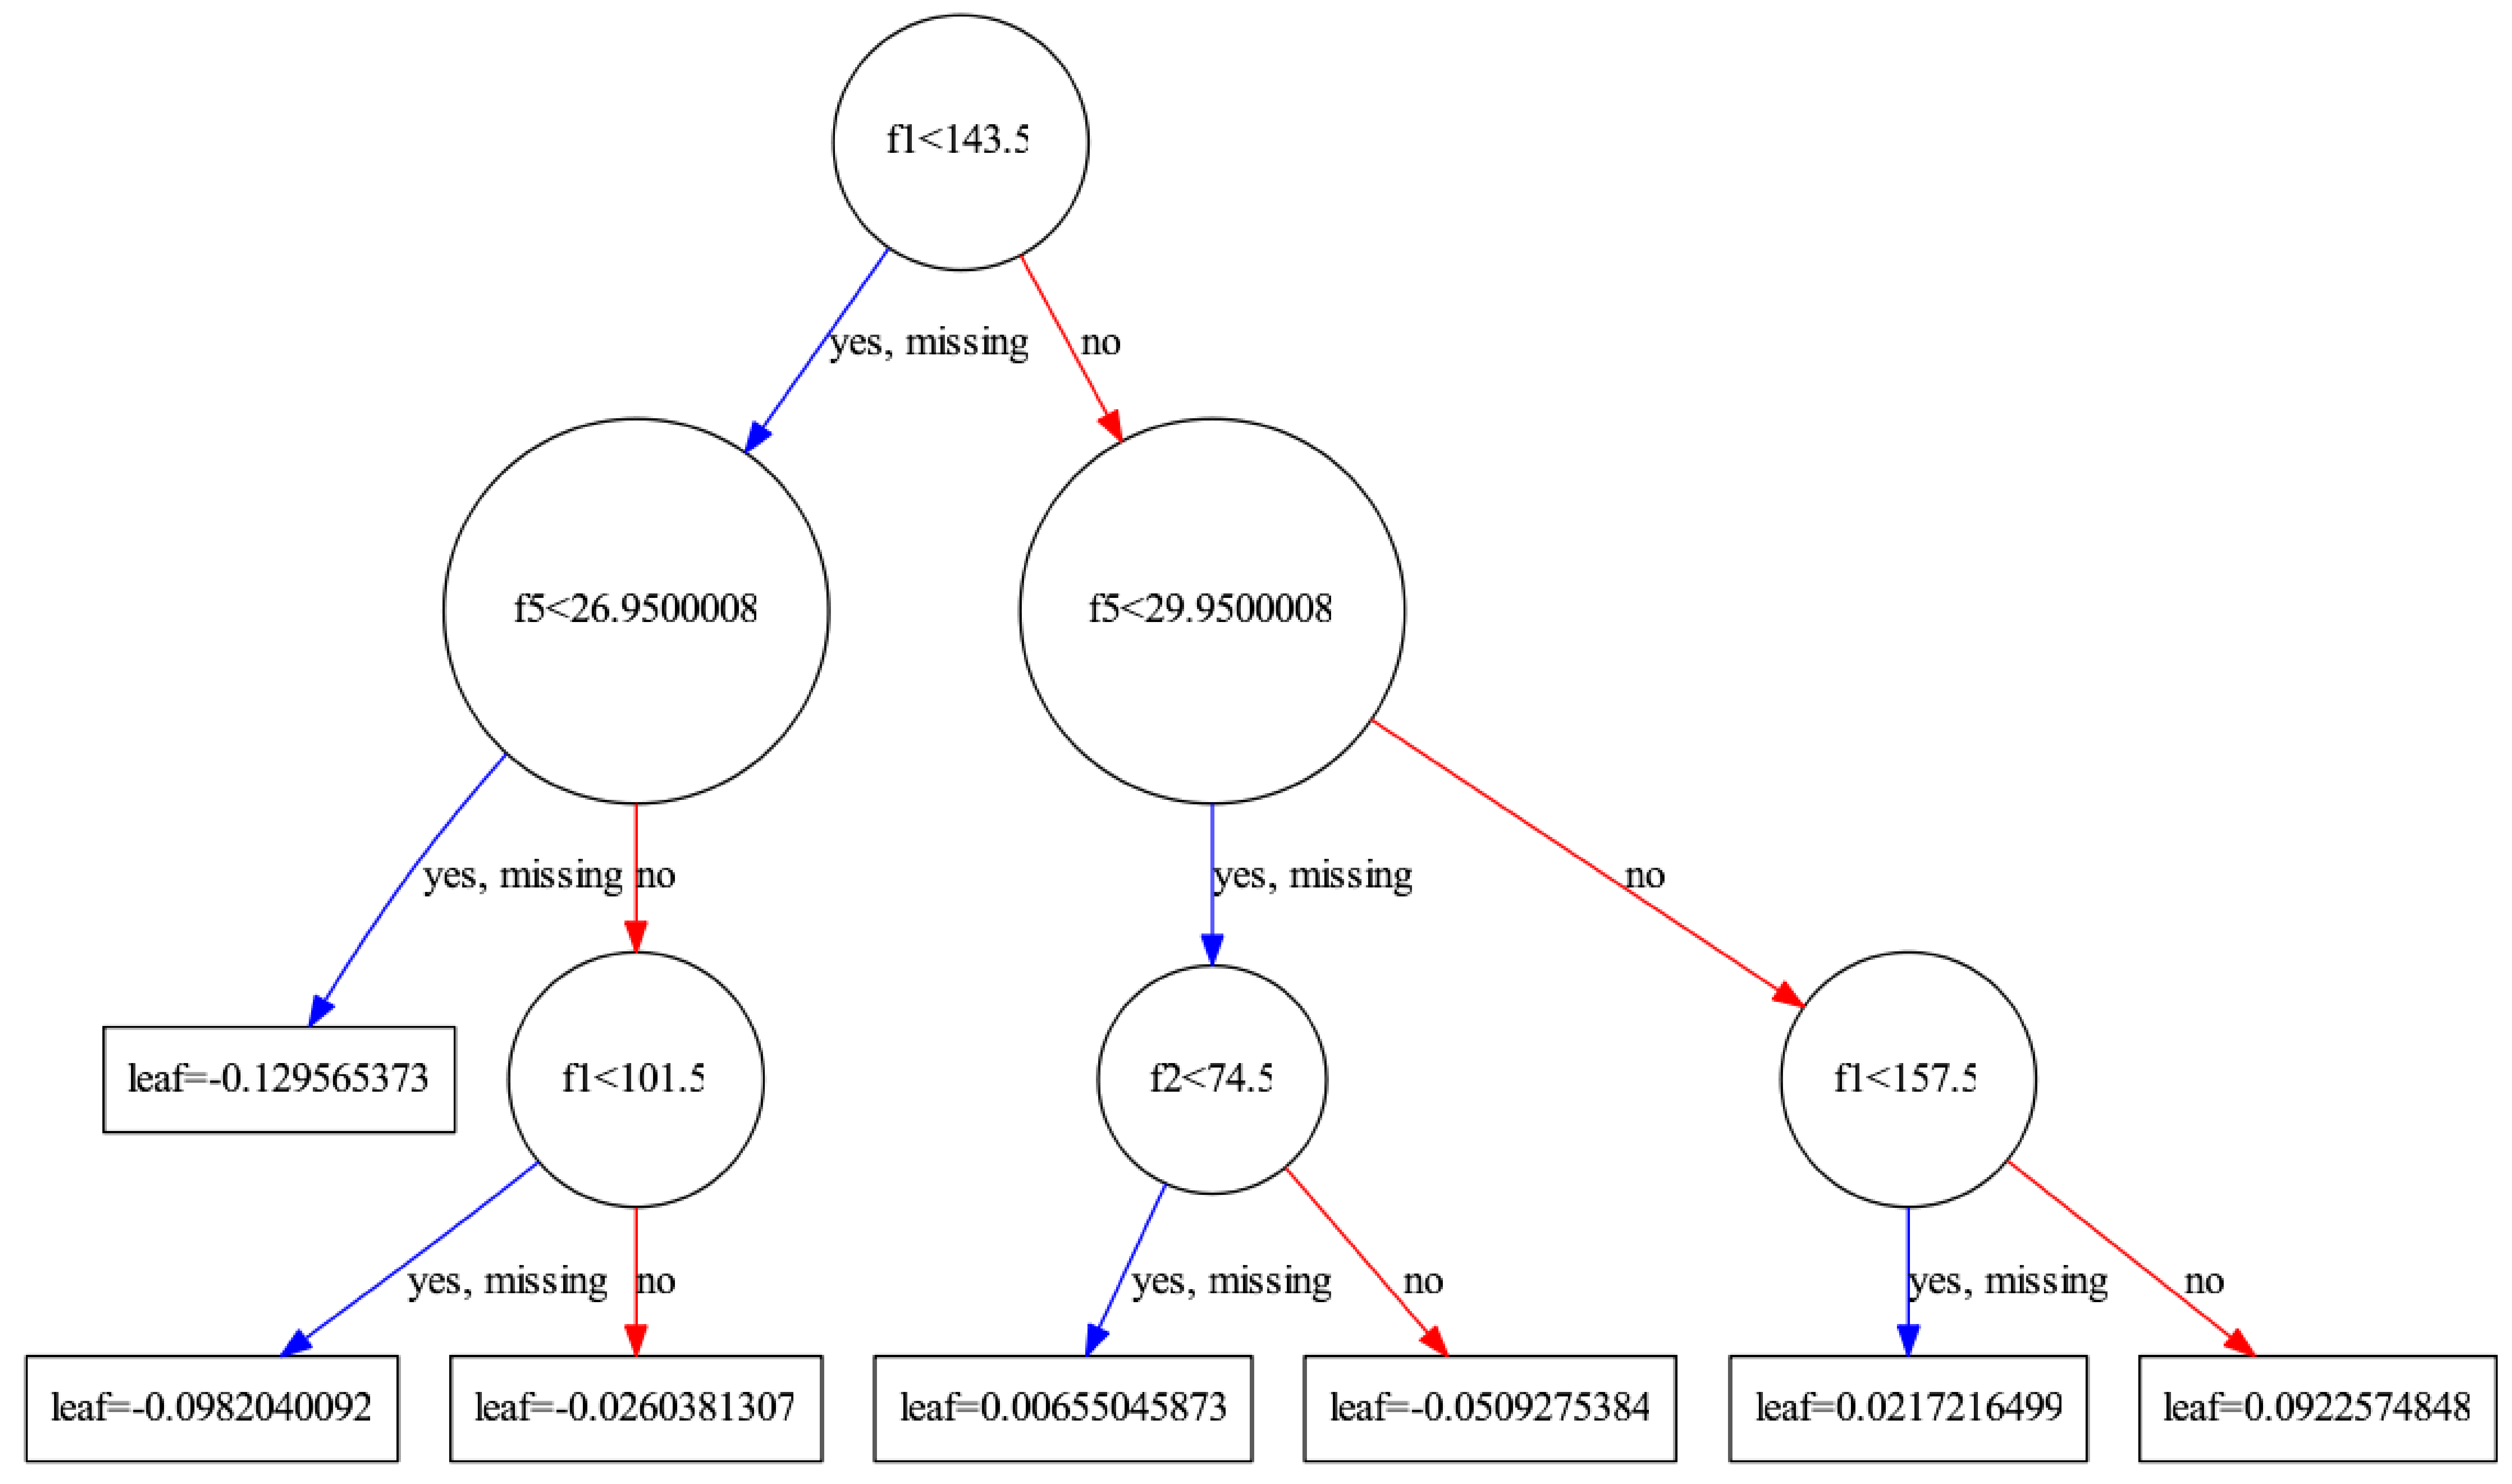

In [207]:
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import matplotlib.pyplot as plt

from xgboost import plot_tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 100,200

plot_tree(model)
plt.show()

614 154


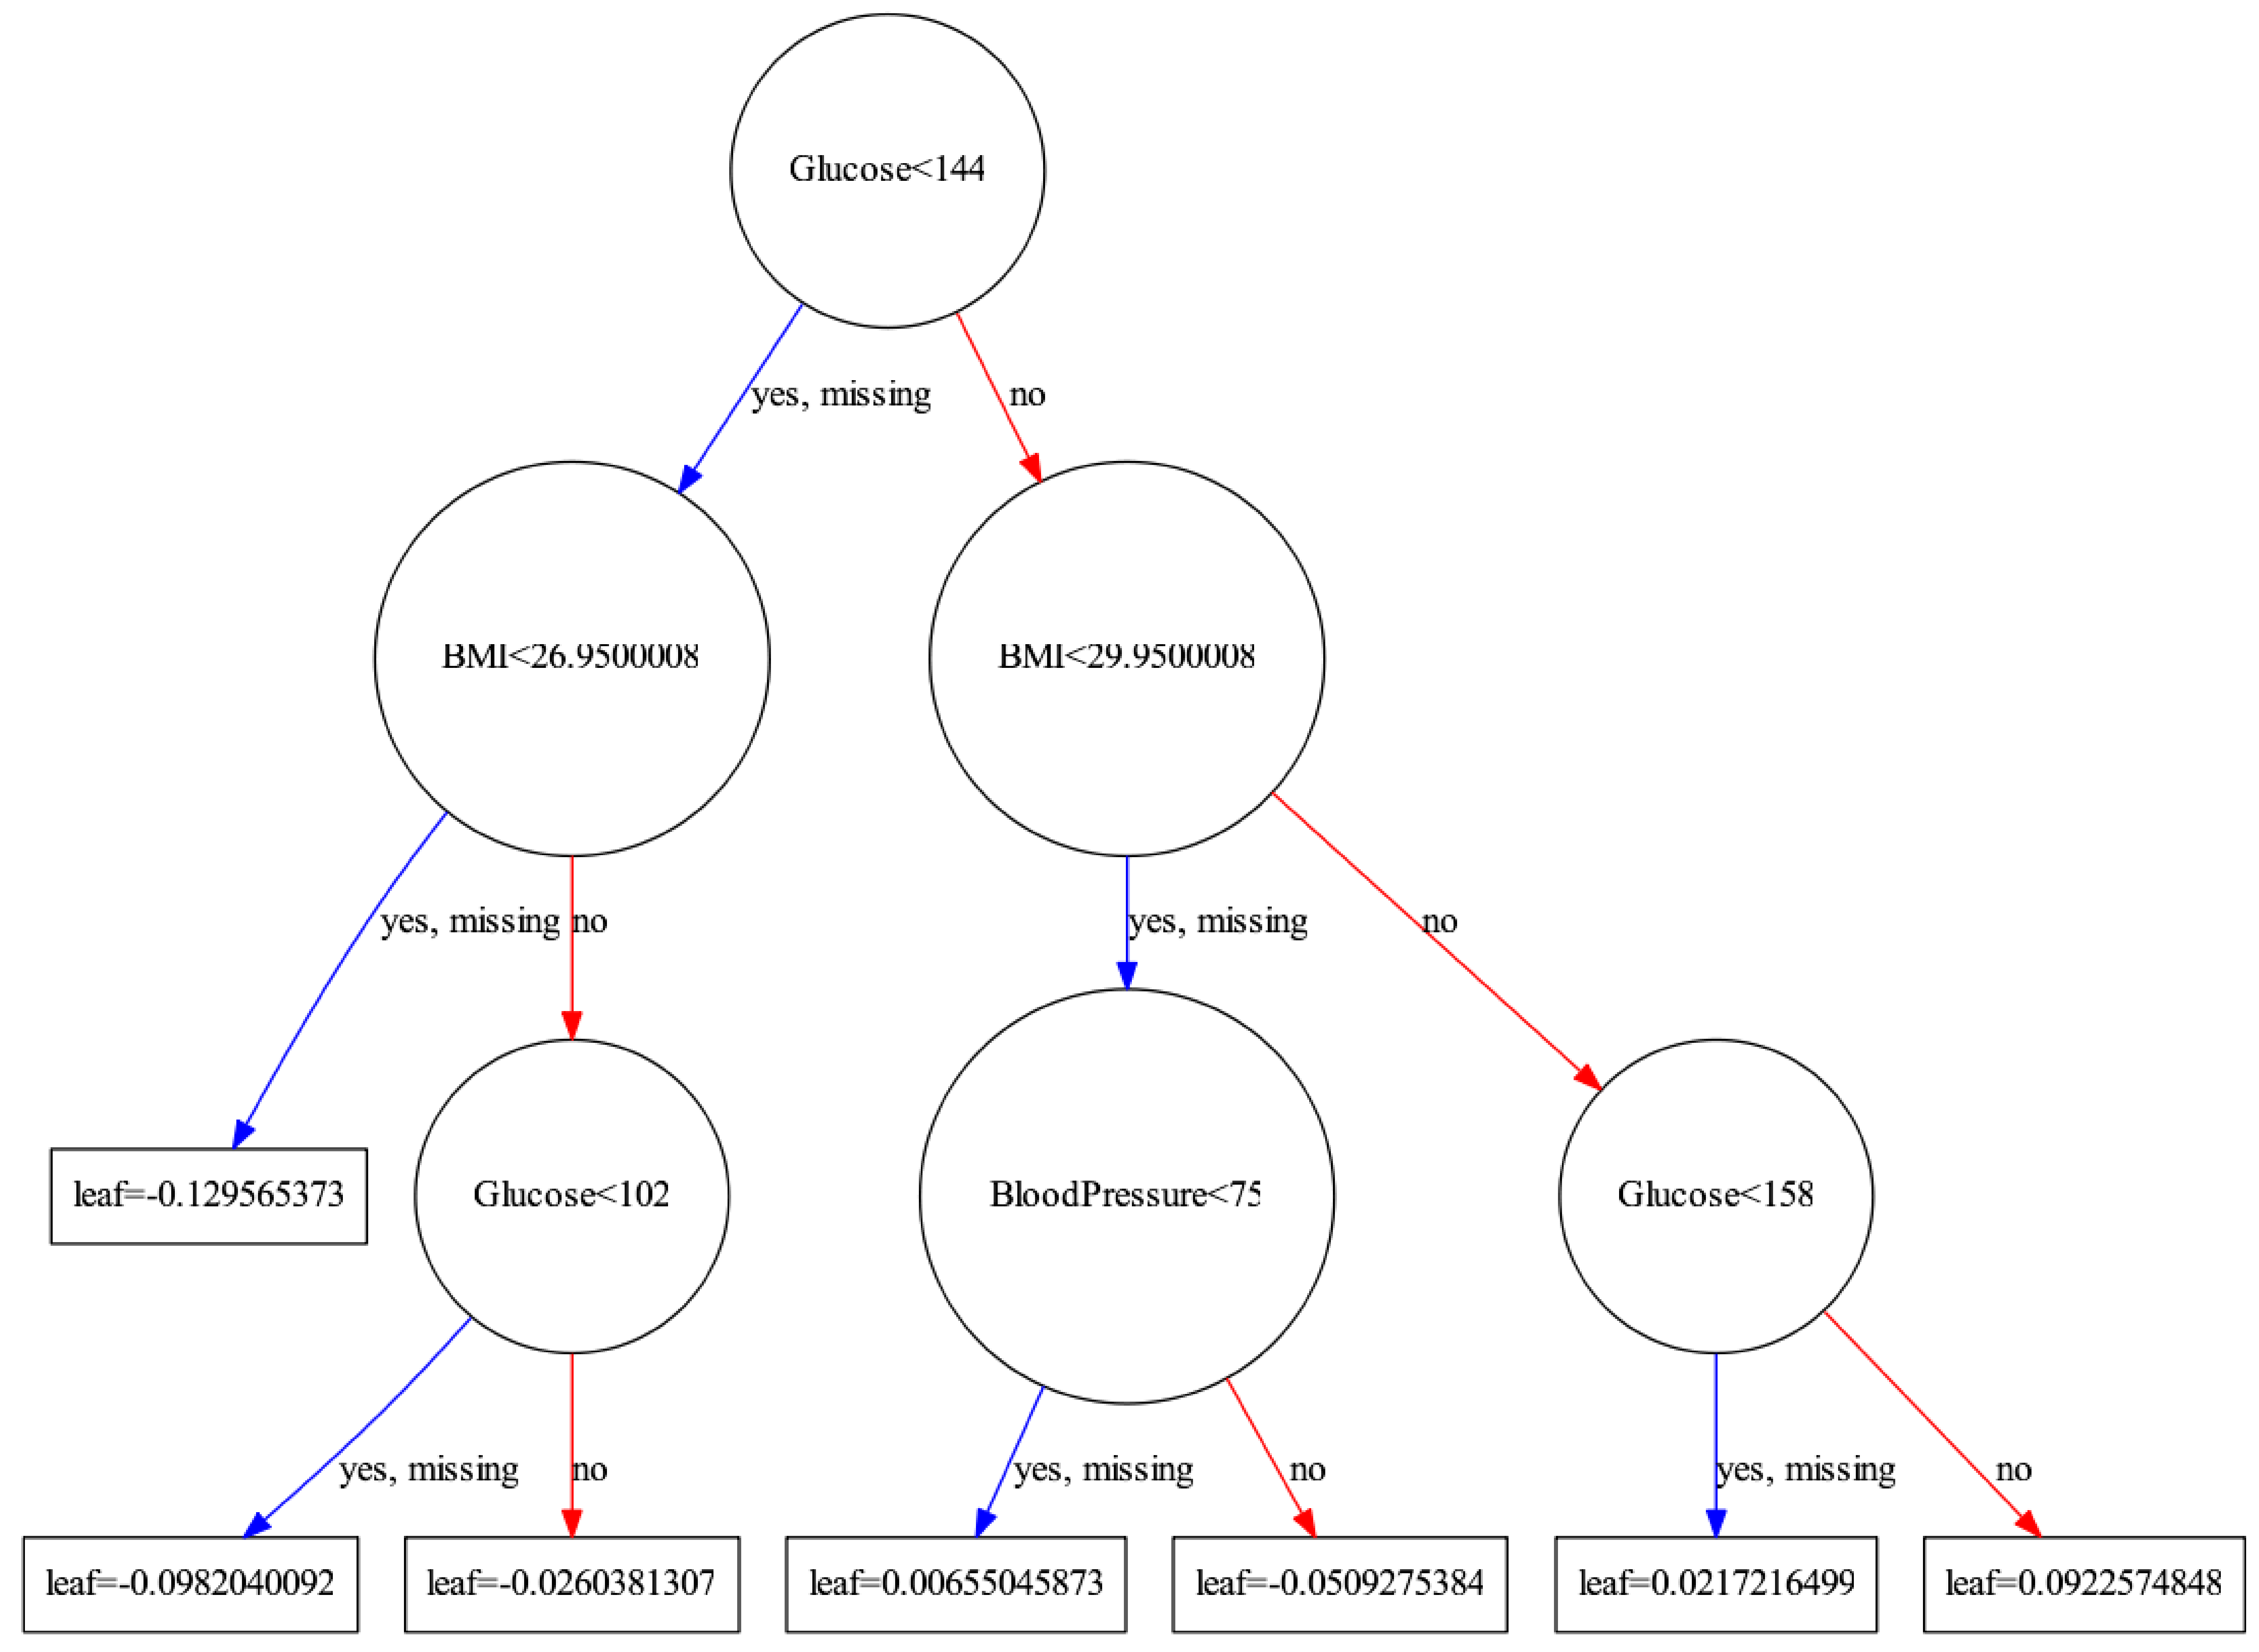

In [209]:
%matplotlib inline
import os
# after pip install graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# plot decision tree
from numpy import loadtxt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
##set up the parameters
rcParams['figure.figsize'] = 100,200

# load data
dataset = pd.read_csv('diabetes.csv', delimiter=",")

# split data into X and y
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
print(len(y_train), len(y_test))

# fit model no training data
model = XGBClassifier(
    booster='dart',
    objective='binary:logistic',
    learning_rate=0.07,
    n_estimators=100,
    reg_alpha =0.49,
    reg_lambda=0.95,
    max_depth=3,
    subsample=0.9
)

model.fit(x_train, y_train)
# plot single tree
plot_tree(model)
plt.show()

In [2]:
print(print_prob(0.101999916))

NameError: name 'print_prob' is not defined

In [210]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.42%


In [6]:
dataset.iloc[:10,0:8]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


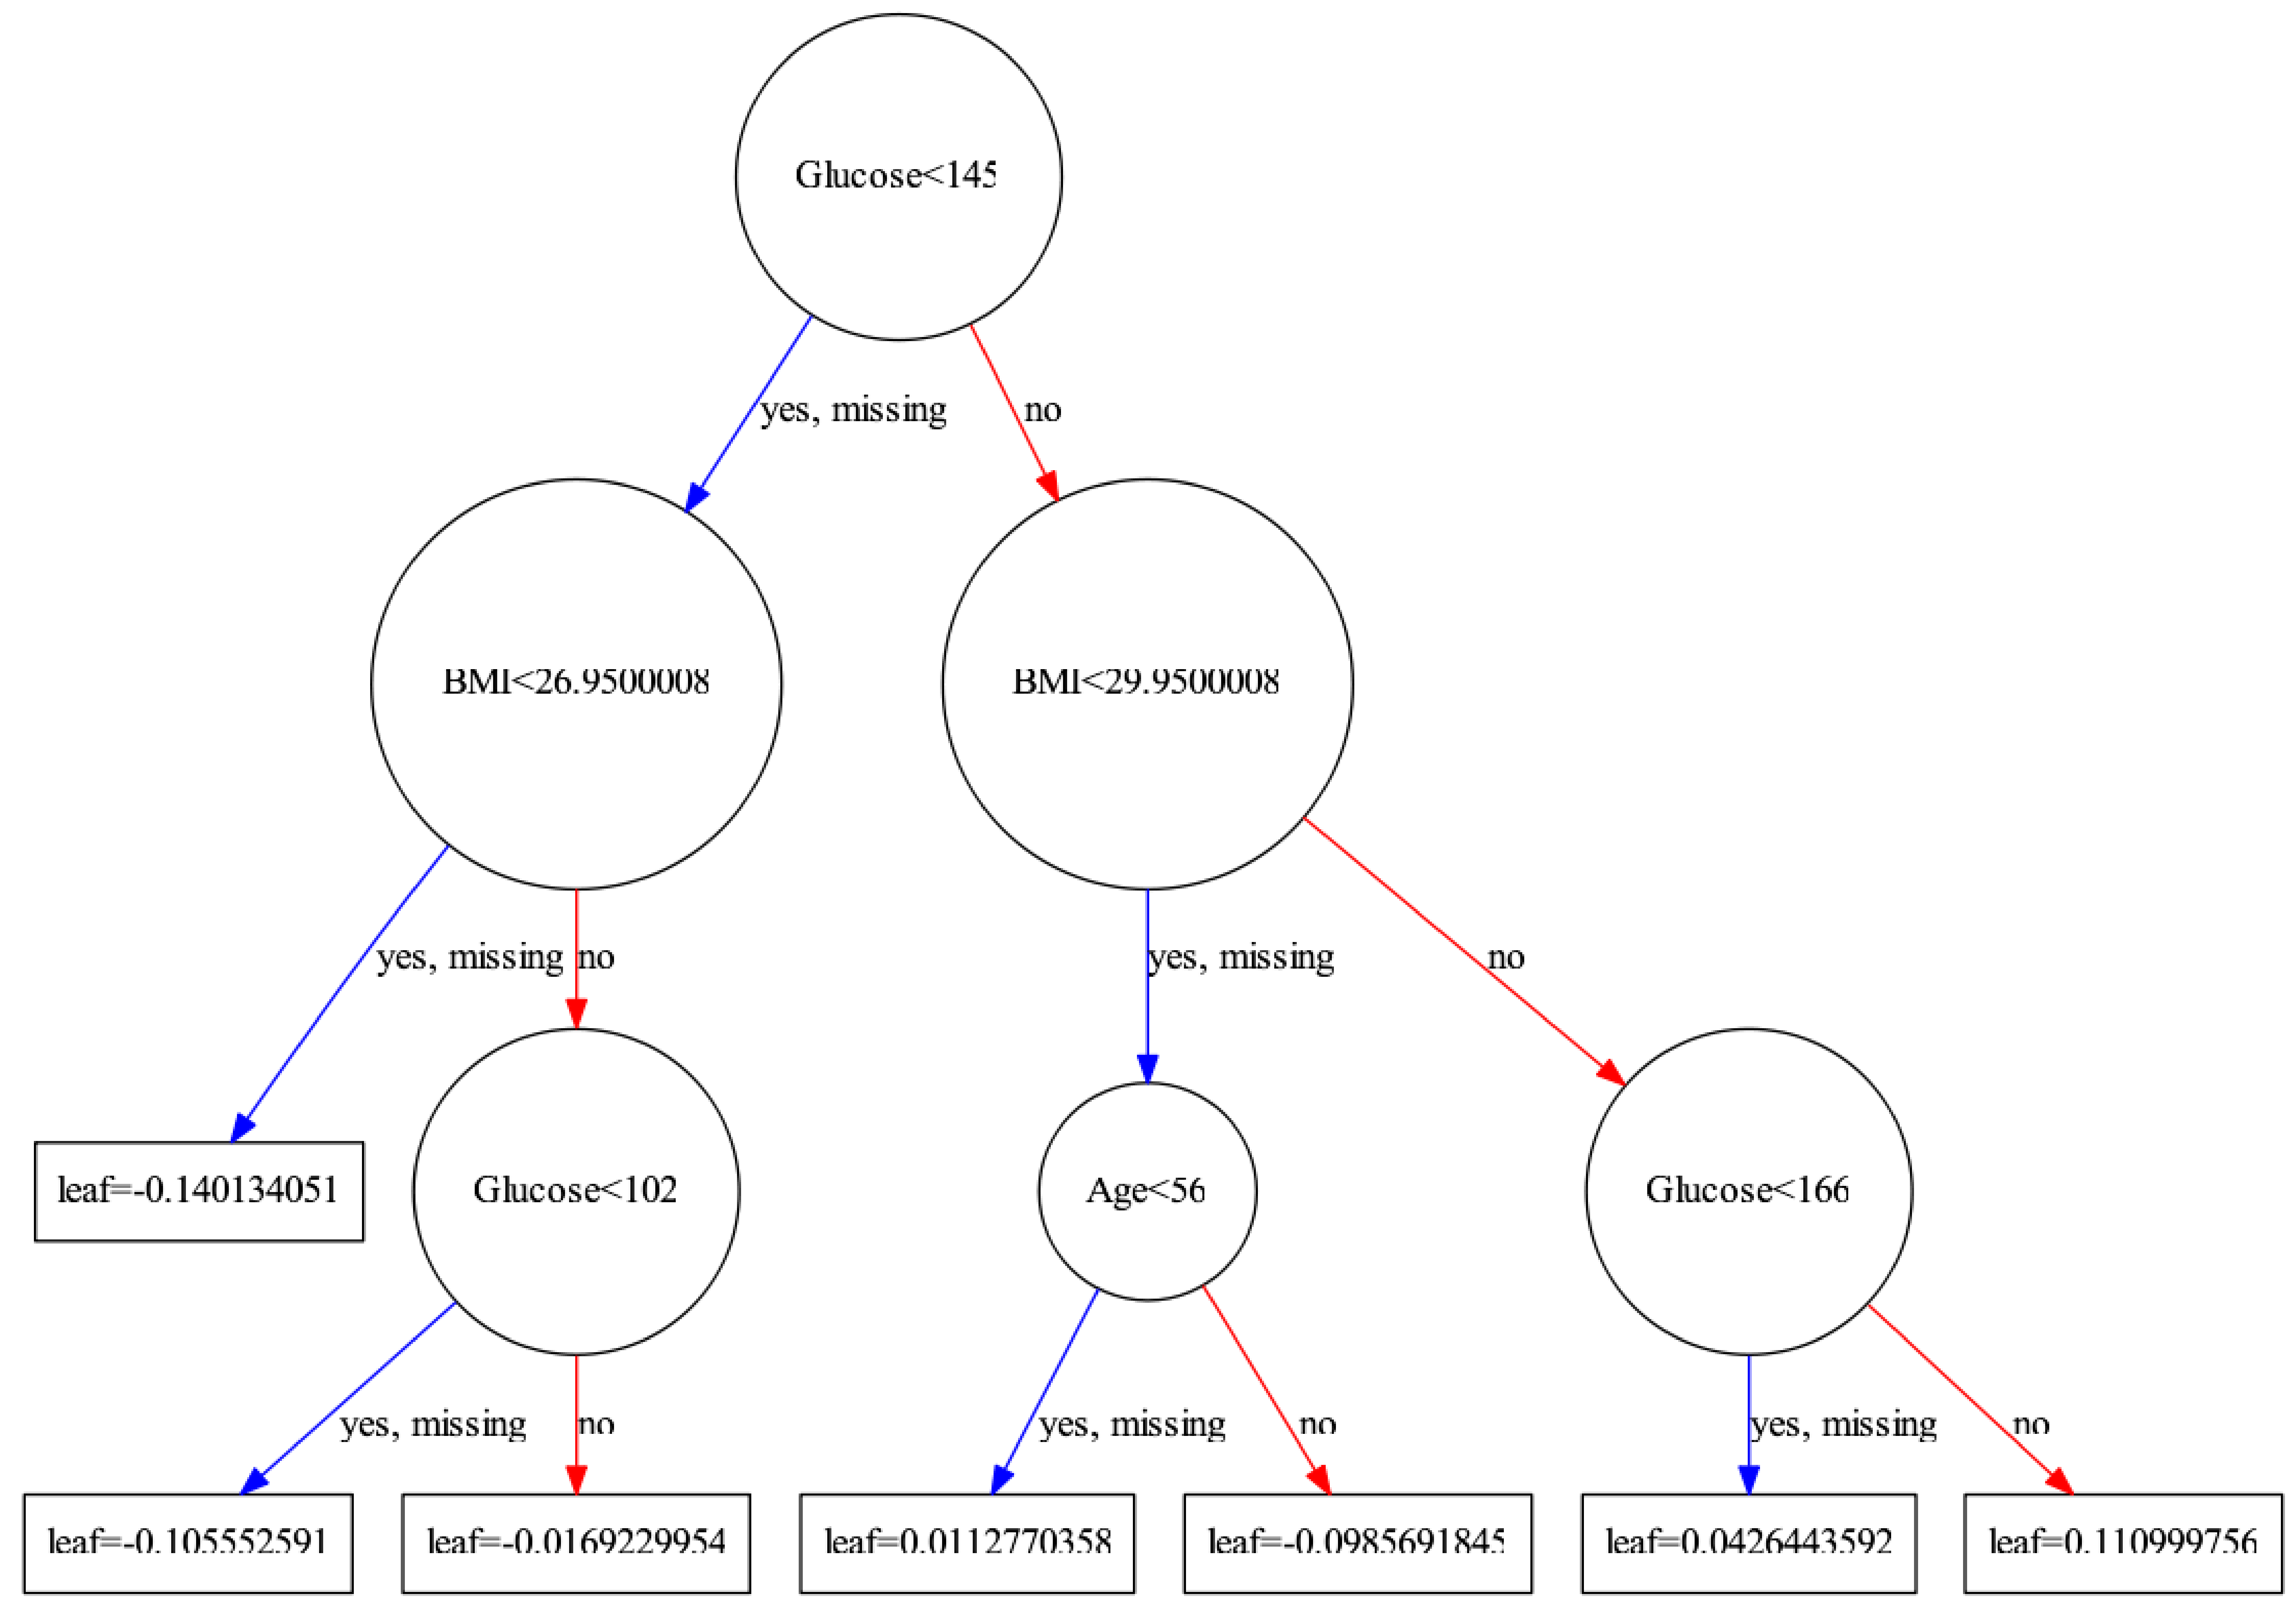

In [7]:
plot_tree(model, num_trees=4)

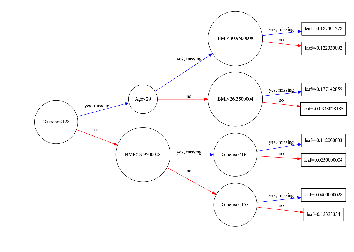

In [10]:
plot_tree(model, num_trees=0, rankdir='LR')

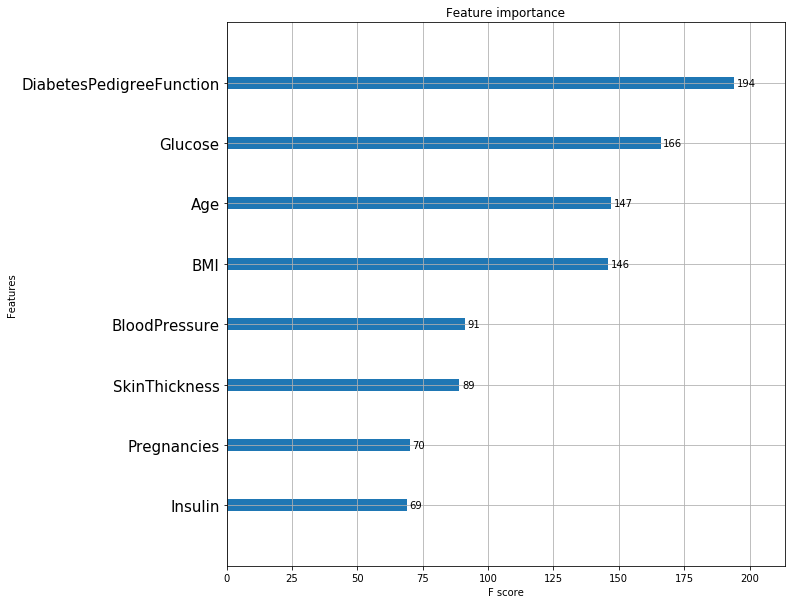

In [19]:
from xgboost import plot_importance
rcParams['figure.figsize'] = 10, 10
plot_importance(model)
plt.yticks(fontsize=15)
plt.show()

In [9]:
col_name = list(dataset.columns)[:8]
print(col_name)

one = [6, 148, 72, 35, 0, 33.6, 0.627, 50]
one_data = pd.DataFrame(one, index=col_name).T

print(model.predict(one_data))

two = {
    'Pregnancies': [6], 
    'Glucose': [148], 
    'BloodPressure': [72], 
    'SkinThickness': [35], 
    'Insulin': [0], 
    'BMI': [33.6], 
    'DiabetesPedigreeFunction': [0.627], 
    'Age': [50]
}
two_data = pd.DataFrame(two)

print(model.predict(two_data))

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[1]
[1]


In [10]:
l = model.predict_proba(two_data)
print('No diabetes: {:.2%}\n Yes diabetes: {:.2%}'.format(l[0][0], l[0][1]))

No diabetes: 20.28%
 Yes diabetes: 79.72%


In [11]:
three = {
    'Pregnancies': [1], 
    'Glucose': [161], 
    'BloodPressure': [72], 
    'SkinThickness': [35], 
    'Insulin': [0], 
    'BMI': [33.6], 
    'DiabetesPedigreeFunction': [0.527], 
    'Age': [20]
}
three_data = pd.DataFrame(three)
l = model.predict_proba(three_data)
print('No diabetes: {:.2%}\n Yes diabetes: {:.2%}'.format(l[0][0], l[0][1]))

No diabetes: 23.62%
 Yes diabetes: 76.38%


In [5]:
from pdpbox import pdp, info_plots, get_dataset

In [59]:
test_titanic = get_dataset.titanic()
test_titanic.keys()

dict_keys(['xgb_model', 'data', 'features', 'target'])

In [60]:
titanic_data = test_titanic['data']
titanic_features = test_titanic['features']
titanic_model = test_titanic['xgb_model']
titanic_target = test_titanic['target']

In [62]:
titanic_data[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0


In [83]:
pima_data[:2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [85]:
list(pima_features)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [92]:
titanic_features

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [94]:
pima_target

str

In [95]:
titanic_target

'Survived'

In [96]:
dataset[:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [80]:
pima_data[:10, :8]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


# dataset distribution through feature 'Glucose'

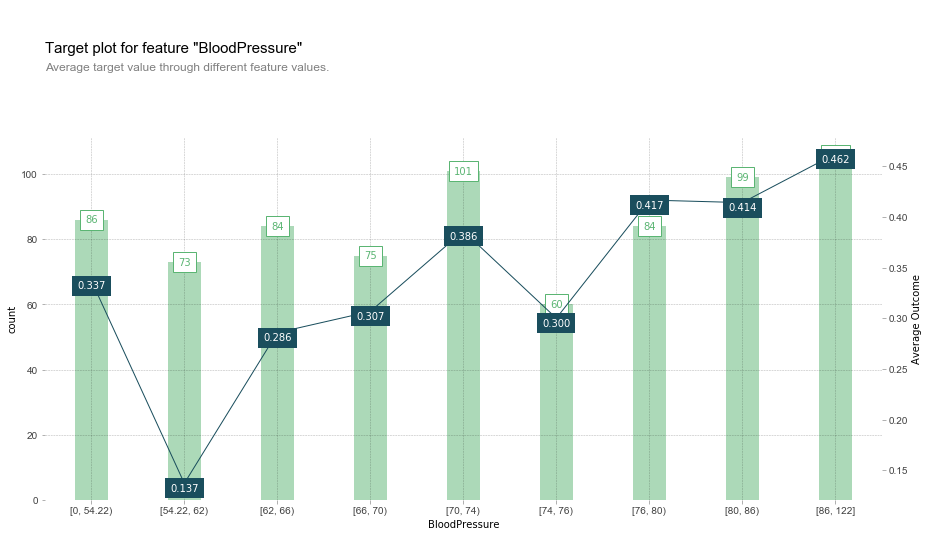

In [7]:
pima_data = dataset
pima_features = dataset.columns[:8]
pima_target = dataset.columns[8]

fig, axes, summary_df = info_plots.target_plot(
    df=pima_data, feature='BloodPressure', feature_name='BloodPressure', target=pima_target
)

In [16]:
summary_df

,x,display_column,value_lower,value_upper,count,Outcome
0,0,"[0, 54.22)",0.000000,54.222222,86,0.337209
1,1,"[54.22, 62)",54.222222,62.000000,73,0.136986
2,2,"[62, 66)",62.000000,66.000000,84,0.285714
3,3,"[66, 70)",66.000000,70.000000,75,0.306667
4,4,"[70, 74)",70.000000,74.000000,101,0.386139
5,5,"[74, 76)",74.000000,76.000000,60,0.300000
6,6,"[76, 80)",76.000000,80.000000,84,0.416667
7,7,"[80, 86)",80.000000,86.000000,99,0.414141
8,8,"[86, 122]",86.000000,122.000000,106,0.462264


# Check predition distribution through 'BloodPressure'

In [103]:
type(titanic_model)

xgboost.sklearn.XGBClassifier

In [102]:
type(model)

xgboost.sklearn.XGBClassifier

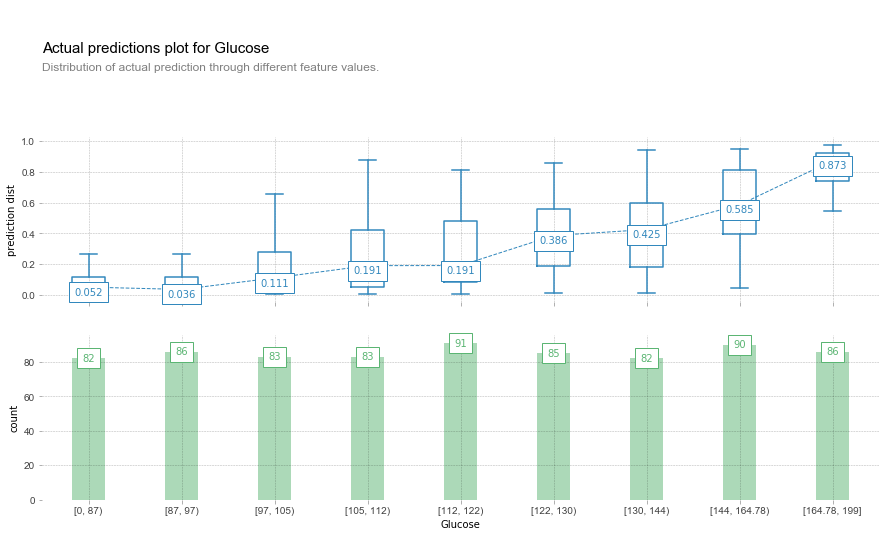

In [17]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, 
    X=pima_data[pima_features], 
    feature='Glucose', 
    feature_name='Glucose', 
    predict_kwds={}
)

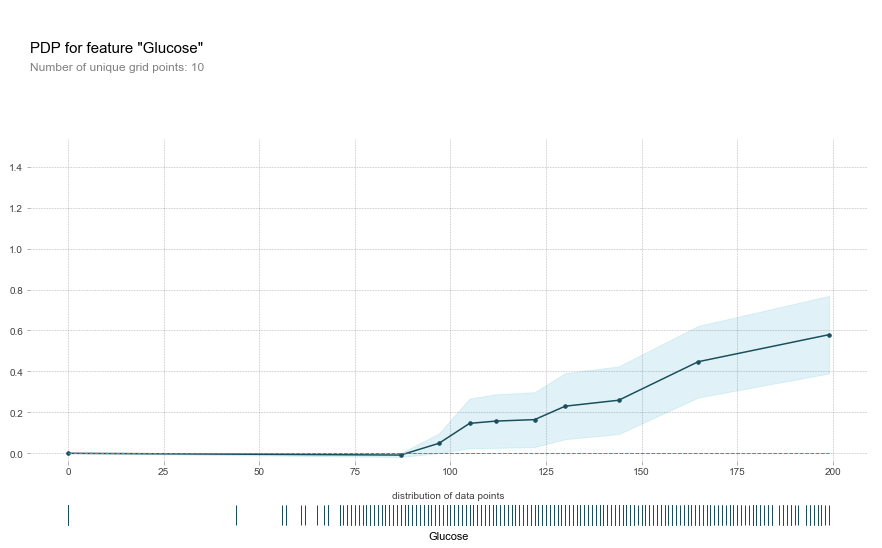

In [8]:
pdp_gc = pdp.pdp_isolate(
    model=model, 
    dataset=pima_data, 
    model_features=pima_features,
    feature='Glucose'
)

#  plot information
fig, axes = pdp.pdp_plot(
    pdp_gc, 
    'Glucose', 
    plot_lines=False, 
    frac_to_plot=0.5, 
    plot_pts_dist=True
)

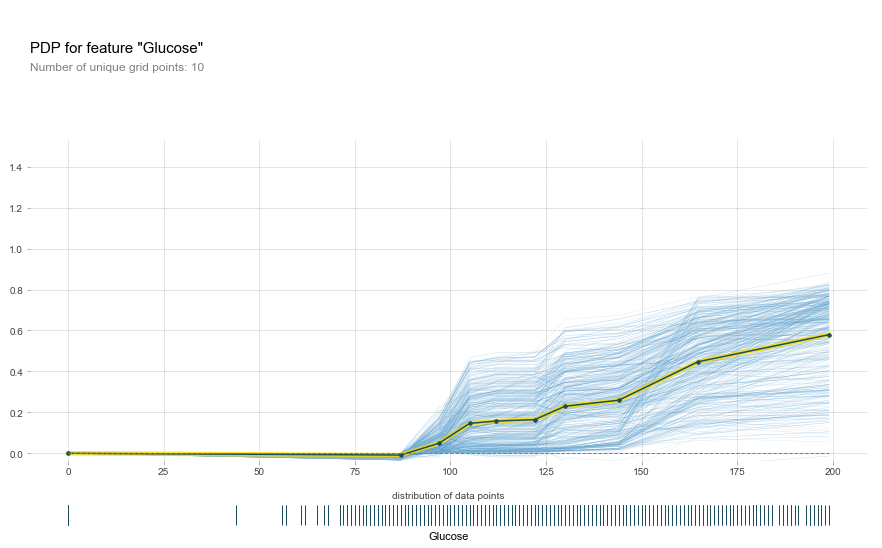

In [22]:
pdp_gc = pdp.pdp_isolate(
    model=model, 
    dataset=pima_data, 
    model_features=pima_features,
    feature='Glucose'
)

#  plot information
fig, axes = pdp.pdp_plot(
    pdp_gc, 
    'Glucose', 
    plot_lines=True, 
    frac_to_plot=0.5, 
    plot_pts_dist=True
)

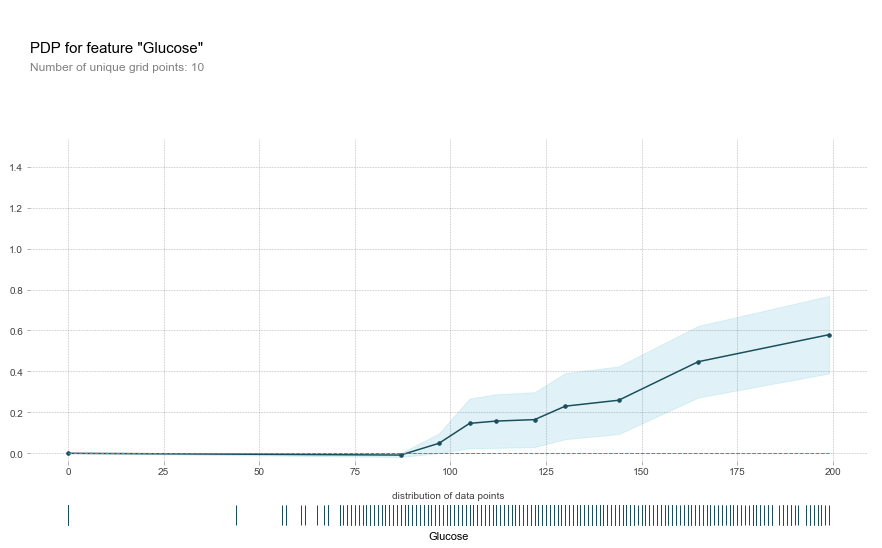

In [31]:
pdp_gc = pdp.pdp_isolate(
    model=model, 
    dataset=pima_data, 
    model_features=pima_features,
    feature='Glucose'
)

#  plot information
fig, axes = pdp.pdp_plot(
    pdp_gc, 
    'Glucose', 
    plot_lines=False, 
    frac_to_plot=0.1, 
    plot_pts_dist=True,
)

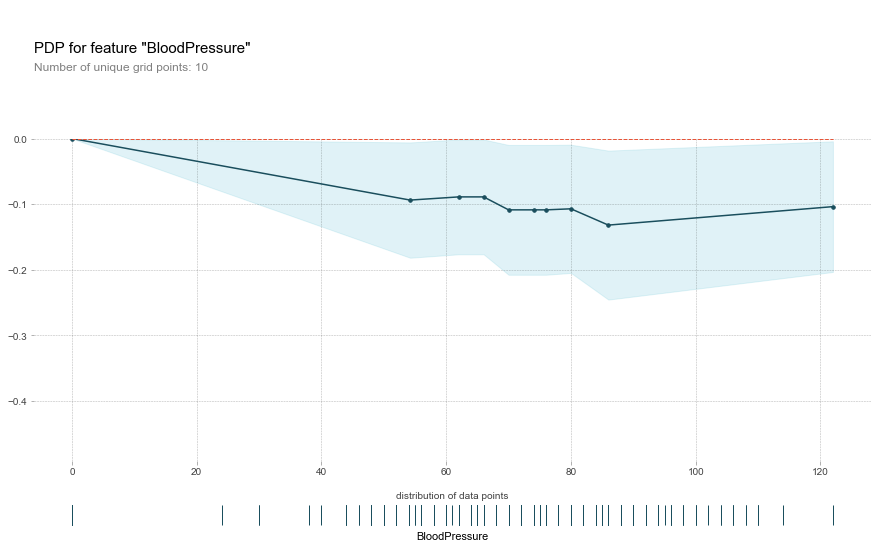

In [44]:
# calculate model with BloodPressure to express pdp
pdp_bp = pdp.pdp_isolate(
    model=model, 
    dataset=pima_data, 
    model_features=pima_features, 
    feature='BloodPressure'
)
# plot PDP on BloodPressure
fig, axes = pdp.pdp_plot(pdp_bp, 
                         'BloodPressure', 
                         plot_lines=False, 
                         frac_to_plot=0.5, 
                         plot_pts_dist=True)

# Target distribution between two variables

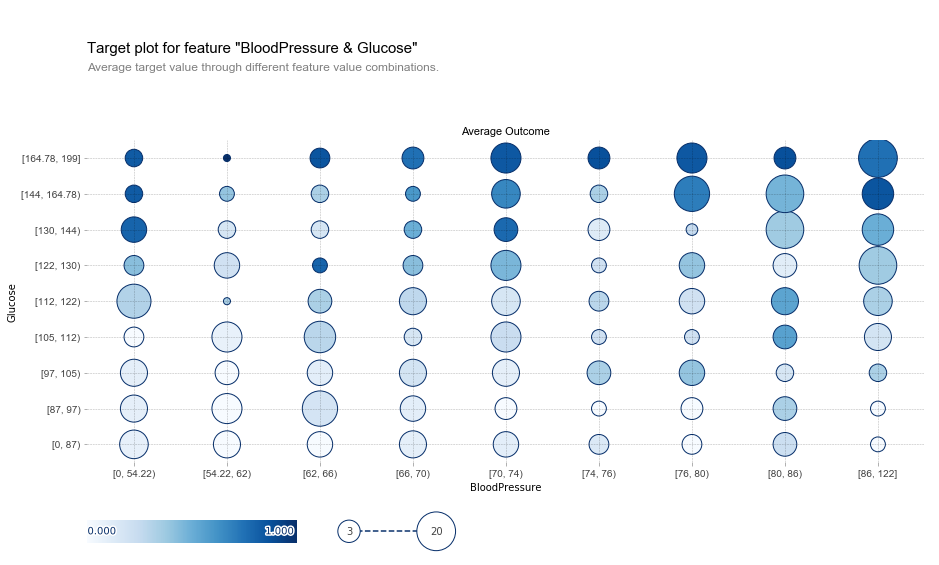

In [32]:
fig, axes, summary_df = info_plots.target_plot_interact(
    df=pima_data, 
    features=['BloodPressure', 'Glucose'], 
    feature_names=['BloodPressure', 'Glucose'], 
    target=pima_target
)

# pdp for feature combination of 'BP' and 'BMI'
https://github.com/SauceCat/PDPbox/blob/master/tutorials/pdpbox_binary_classification.ipynb

In [39]:
pdp_intertatcion

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

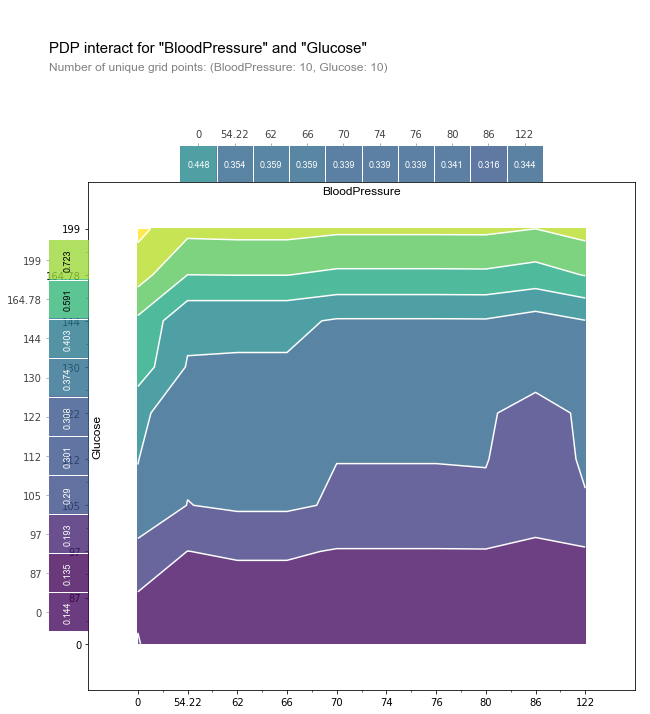

In [37]:
pdp_intertatcion = pdp.pdp_interact(
    model=model, 
    dataset=pima_data, 
    model_features=pima_features, 
    features=['BloodPressure', 'Glucose']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_intertatcion, 
    feature_names=['BloodPressure', 'Glucose'], 
    plot_type='contour', 
    x_quantile=True, 
    plot_pdp=True
)

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

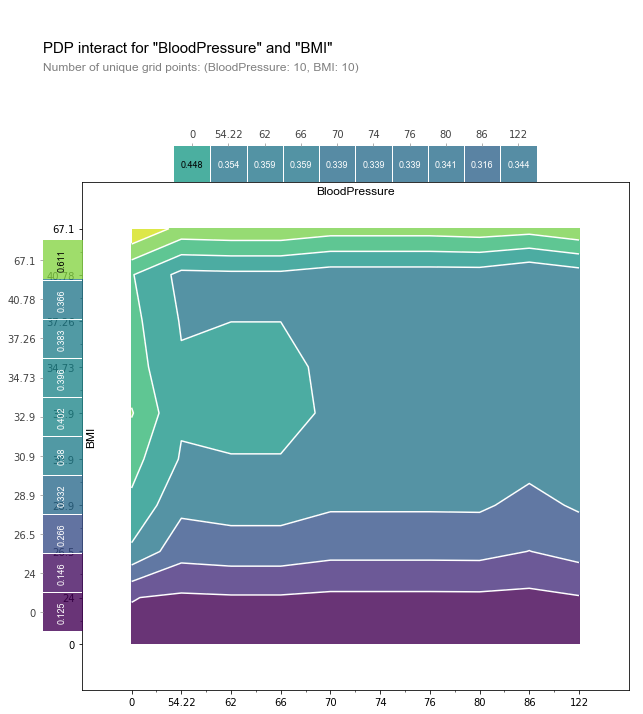

In [42]:
pdp_gb = pdp.pdp_interact(
    model=model, 
    dataset=pima_data, 
    model_features=pima_features, 
    features=['BloodPressure', 'BMI']
)

fig, axes = pdp.pdp_interact_plot(pdp_gb, 
                                  ['BloodPressure', 'BMI'], 
                                  plot_type='contour', 
                                  x_quantile=True, 
                                  plot_pdp=True)

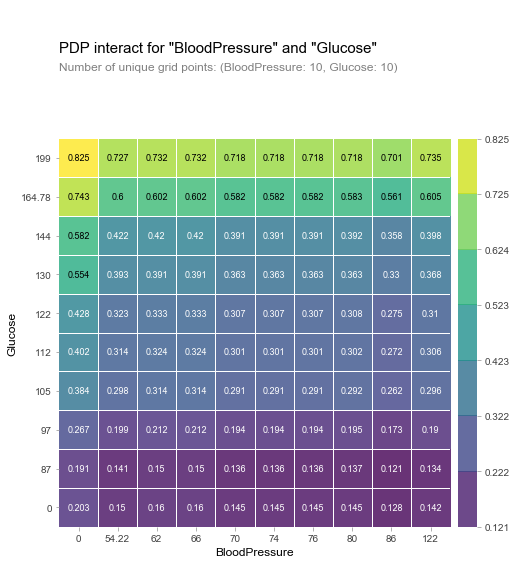

In [43]:
fig, axes = pdp.pdp_interact_plot(pdp_intertatcion, 
                                  ['BloodPressure', 'Glucose'], 
                                  plot_type='grid', 
                                  x_quantile=True, 
                                  plot_pdp=False)